In [1]:
import pandas as pd
import numpy as np
import os
import ants
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../Data/ABIDE_legend_S982.csv')
df

Unnamed: 0  index  BIDS_ID Anonymized ID Subject Type      Visit  \
0             0      0  sub-001     A00033348      PATIENT  session_1   
1             1      1  sub-002     A00033398      CONTROL  session_1   
2             2      2  sub-003     A00033352      PATIENT  session_1   
3             3      3  sub-004     A00033389      CONTROL  session_1   
4             4      4  sub-005     A00033354      PATIENT  session_1   
..          ...    ...      ...           ...          ...        ...   
977         977   1094  sub-985     A00032725      CONTROL  session_1   
978         978   1095  sub-986     A00032704      PATIENT  session_1   
979         979   1096  sub-987     A00032740      CONTROL  session_1   
980         980   1098  sub-989     A00032686      PATIENT  session_1   
981         981   1099  sub-990     A00032702      PATIENT  session_1   

     Days since enrollment  SubID  DxGroup  DSMIVTR  ...  WISC4 Sym Scaled  \
0                        8  51320        1      2.0  ...               NaN   
1                        8  51373        2      0.0  ...               NaN   
2                        8  51324        1      2.0  ...               NaN   
3                        8  51364        2      0.0  ...               NaN   
4                        8  51326        1      2.0  ...               NaN   
..                     ...    ...      ...      ...  ...               ...   
977                     28  51252        2      0.0  ...               NaN   
978                     28  51229        1      1.0  ...               NaN   
979                     28  51268        2      0.0  ...               NaN   
980                     28  51210        1      1.0  ...               NaN   
981                     28  51227        1      1.0  ...               NaN   

     Age at MPRAGE  Current Med Status  Medication Name  Medication Name.1  \
0              NaN                 0.0              NaN                NaN   
1              NaN                 0.0              NaN                NaN   
2              NaN                 0.0              NaN                NaN   
3              NaN                 0.0              NaN                NaN   
4              NaN                 0.0              NaN                NaN   
..             ...                 ...              ...                ...   
977          10.99                 0.0              NaN                NaN   
978          14.59                 0.0              NaN                NaN   
979          17.78                 0.0              NaN                NaN   
980          16.56                 0.0              NaN                NaN   
981          14.53                 0.0              NaN                NaN   

    Off stimulants at EPI scan? ScanSite ScannerType  ScannerID  ScanSiteID  
0                           NaN      mpg       verio          7           3  
1                           NaN      mpg       verio          7           3  
2                           NaN      mpg       verio          7           3  
3                           NaN      mpg       verio          7           3  
4                           NaN      mpg       verio          7           3  
..                          ...      ...         ...        ...         ...  
977                         NaN     ucla     triotim          6          12  
978                         NaN     ucla     triotim          6          12  
979                         NaN     ucla     triotim          6          12  
980                         NaN     ucla     triotim          6          12  
981                         NaN     ucla     triotim          6          12  

[982 rows x 90 columns]

In [3]:
indir = '../../data/fMRI_InData/abide_bids/'

In [4]:
asubs = [sub for sub in os.listdir(indir) if sub.startswith('sub-')]
asubs.sort()
len(asubs)

1109

In [5]:
df['BIDS_ID'].isin(asubs).values.mean()

1.0

In [6]:
all_bad_subs = np.array(asubs)[np.array([sub not in df['BIDS_ID'].values for sub in asubs])]
bad_subs = all_bad_subs
has_anat = np.array([os.path.exists(os.path.join(indir,sub,'anat',f'{sub}_T1w.nii')) for sub in bad_subs])
f'{(~has_anat).sum()} dont have anat'
bad_subs = bad_subs[has_anat]

In [7]:
has_anat.sum()

117

In [8]:
has_segment = np.array([os.path.exists(os.path.join(indir,sub,'anat',f'c1{sub}_T1wo.nii')) for sub in bad_subs])
has_segment.sum()

109

In [9]:
has_brain = np.array([os.path.exists(os.path.join(indir,sub,'anat',f'{sub}_brain.nii')) for sub in bad_subs])
has_segment.sum()

109

In [10]:
bad_subs

array(['sub-084', 'sub-085', 'sub-086', 'sub-088', 'sub-091', 'sub-093',
       'sub-094', 'sub-095', 'sub-096', 'sub-097', 'sub-098', 'sub-099',
       'sub-101', 'sub-102', 'sub-104', 'sub-105', 'sub-106', 'sub-108',
       'sub-109', 'sub-110', 'sub-111', 'sub-112', 'sub-113', 'sub-117',
       'sub-119', 'sub-121', 'sub-122', 'sub-123', 'sub-124', 'sub-125',
       'sub-126', 'sub-127', 'sub-128', 'sub-129', 'sub-130', 'sub-132',
       'sub-133', 'sub-134', 'sub-135', 'sub-136', 'sub-137', 'sub-138',
       'sub-140', 'sub-141', 'sub-142', 'sub-143', 'sub-144', 'sub-145',
       'sub-146', 'sub-149', 'sub-150', 'sub-151', 'sub-152', 'sub-153',
       'sub-154', 'sub-155', 'sub-156', 'sub-158', 'sub-159', 'sub-160',
       'sub-161', 'sub-162', 'sub-163', 'sub-164', 'sub-165', 'sub-166',
       'sub-167', 'sub-168', 'sub-169', 'sub-172', 'sub-175', 'sub-176',
       'sub-178', 'sub-179', 'sub-180', 'sub-181', 'sub-182', 'sub-183',
       'sub-184', 'sub-185', 'sub-186', 'sub-187', 

In [11]:
def snr(t1):
    return t1.numpy().mean() / t1.numpy().std()

(array([ 7.,  6., 17., 27., 19., 15., 12.,  5.,  5.,  4.]),
 array([0.43395758, 0.45061916, 0.46728075, 0.48394233, 0.5006039 ,
        0.5172655 , 0.5339271 , 0.55058867, 0.56725025, 0.58391184,
        0.6005734 ], dtype=float32),
 <BarContainer object of 10 artists>)

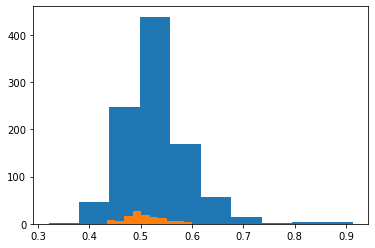

In [12]:
#snr_badsubs = np.array([snr(get_scan(sub)) for sub in bad_subs])
#snr_goodsubs = np.array([snr(get_scan(sub)) for sub in tqdm(df['BIDS_ID'].values)])

#np.save('../Data/snr_badsubs.npy',snr_badsubs)
#np.save('../Data/snr_goodsubs.npy',snr_goodsubs)

snr_badsubs = np.load('../Data/snr_badsubs.npy')
snr_goodsubs = np.load('../Data/snr_goodsubs.npy')

plt.hist(snr_goodsubs)
plt.hist(snr_badsubs)

In [13]:
import scipy 
scipy.stats.ttest_ind(snr_goodsubs,snr_badsubs)

Ttest_indResult(statistic=3.6656546709291766, pvalue=0.0002585168811724025)

In [14]:
def plot_ortho(im,overlay=None):
    im.plot_ortho(overlay,flat=True,xyz_lines=False,orient_labels=False)

In [30]:
def get_scan(sub,fn='{}_T1w.nii'):
    #t1_fn = os.path.join(indir,sub,'anat',f'{sub}_T1w.nii')
    t1_fn = os.path.join(indir,sub,'anat',fn.format(sub))
    t1 = ants.image_read(t1_fn)
    return t1

In [31]:
sub = asubs[10]
sub = bad_subs[0]
def plot_brain_overlay(sub):
    im = get_scan(sub,'{}_T1wo.nii')
    
    try:
        c1 = get_scan(sub,'c1{}_T1wo.nii')
        c2 = get_scan(sub,'c2{}_T1wo.nii')
        brain = c1+c2
    except:
        brain=None
    im.plot_ortho(brain,flat=True,xyz_lines=False,orient_labels=False,title=sub)

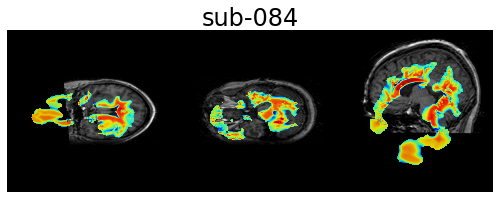

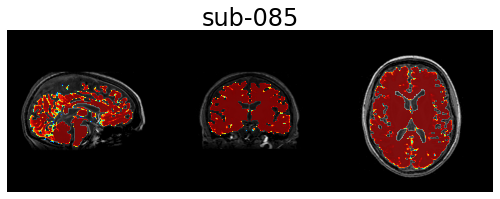

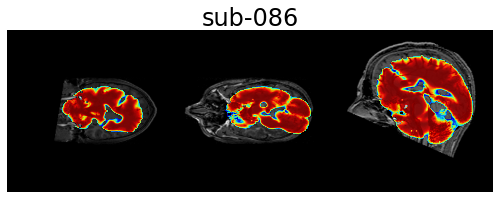

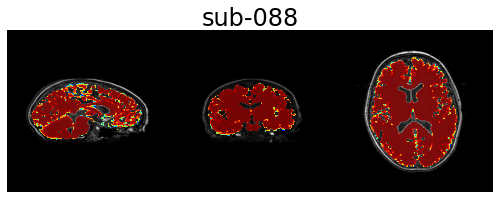

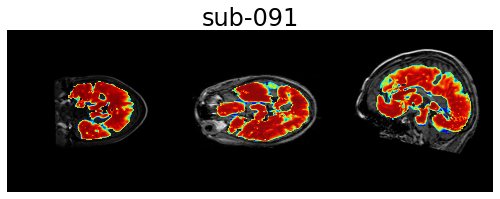

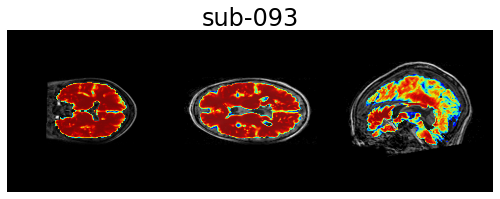

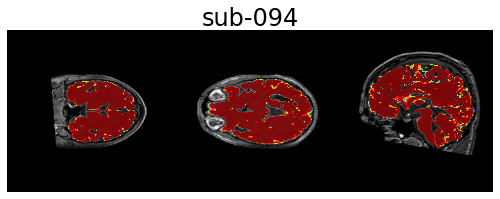

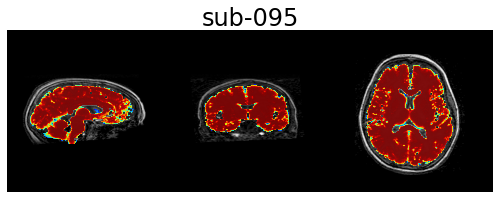

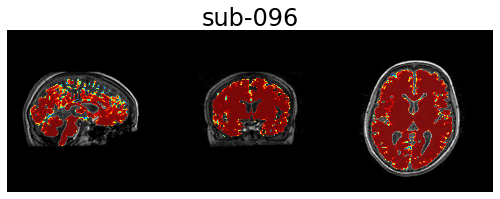

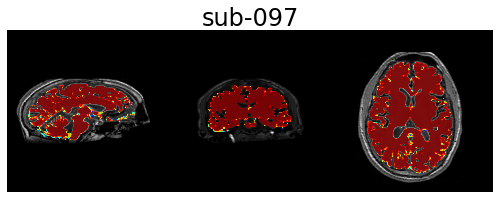

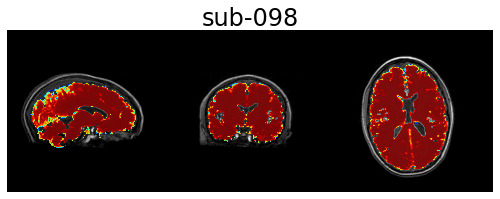

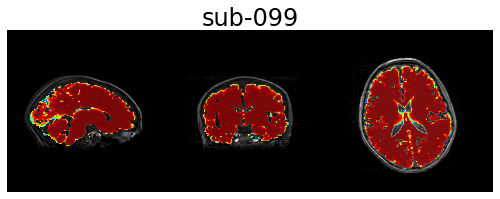

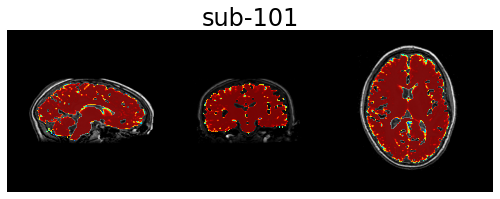

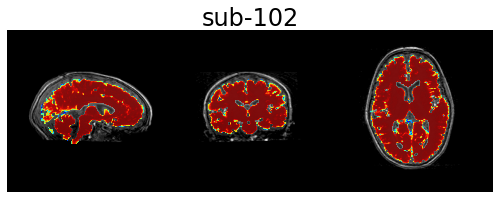

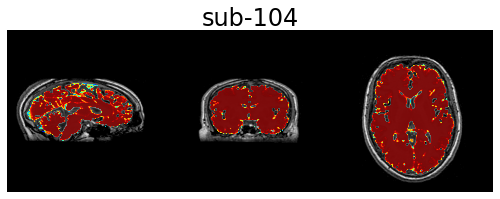

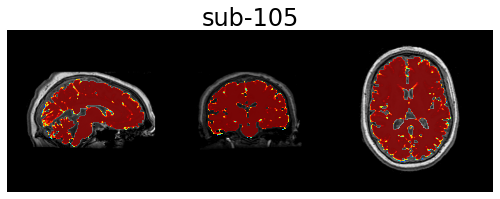

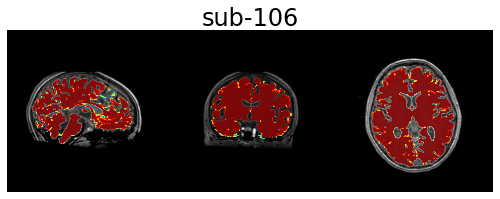

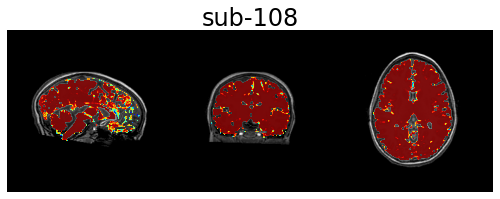

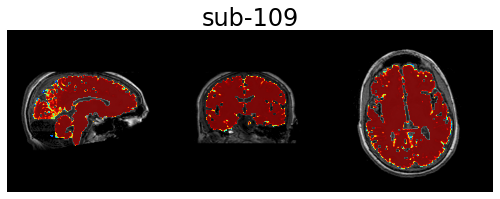

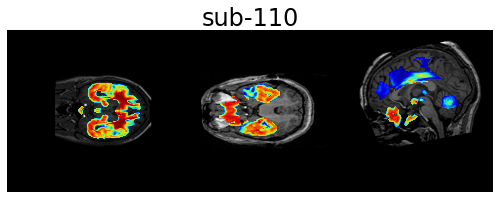

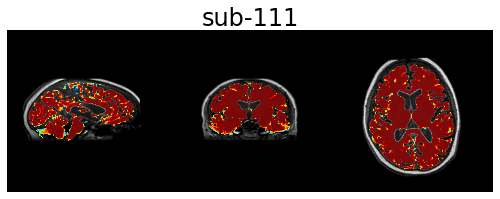

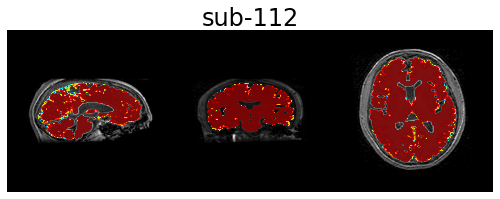

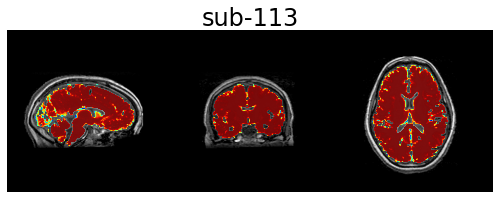

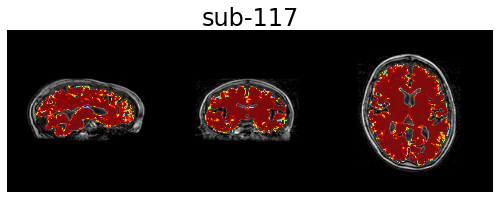

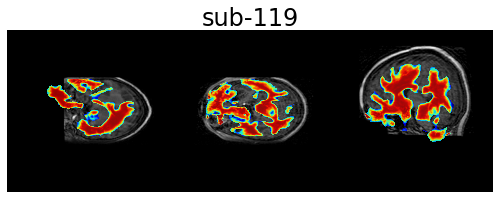

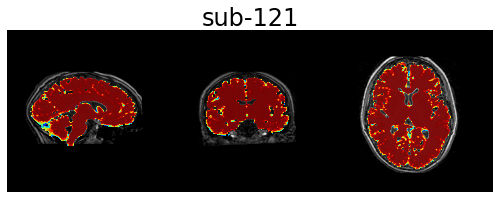

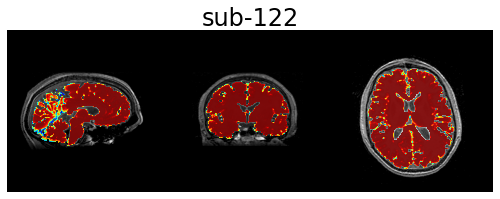

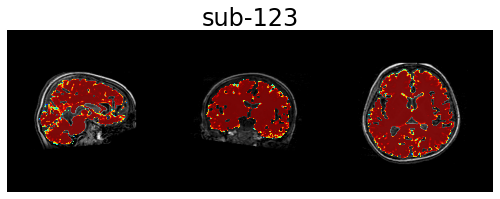

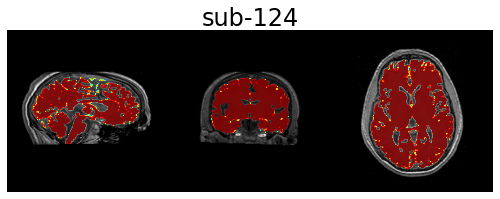

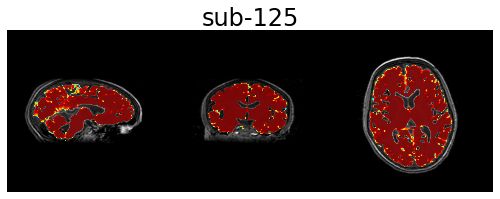

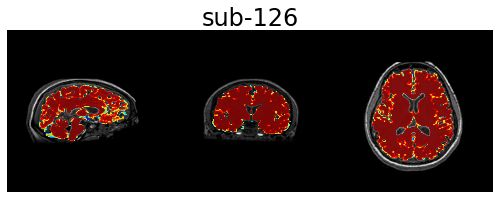

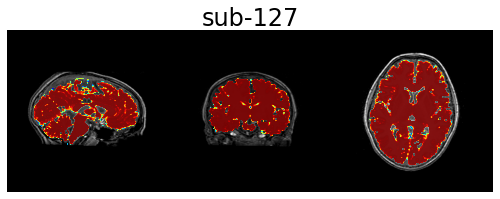

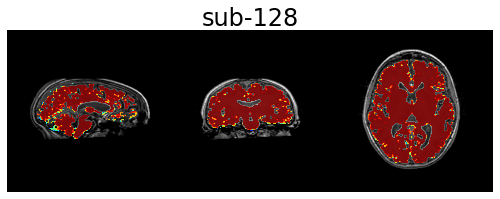

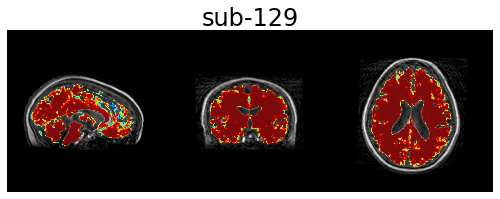

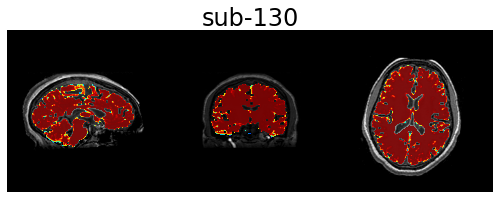

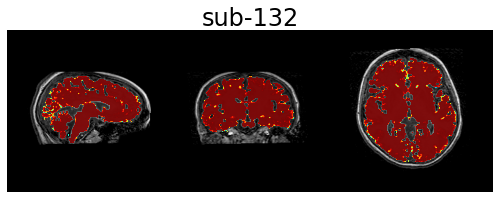

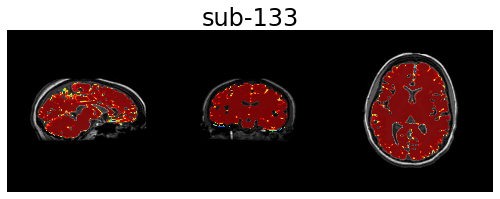

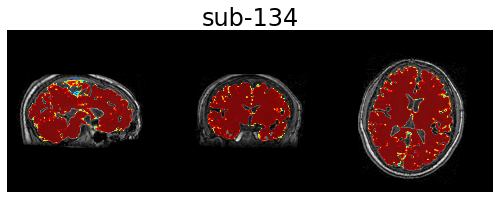

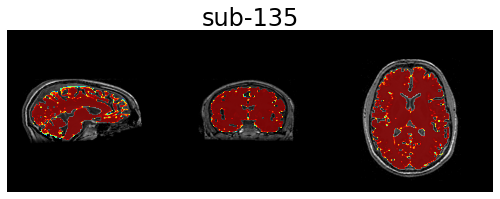

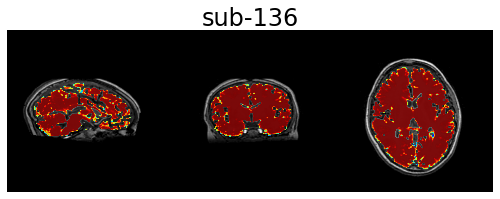

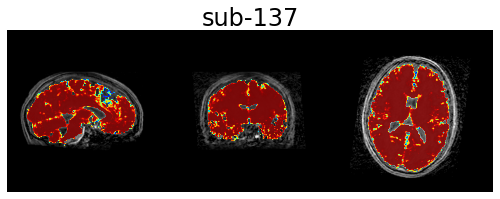

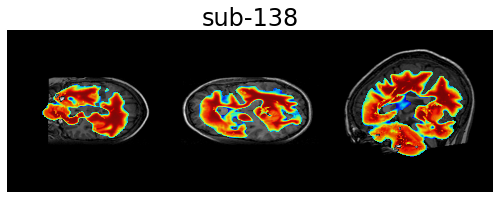

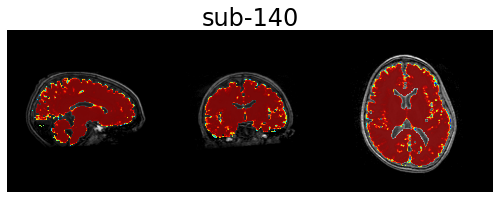

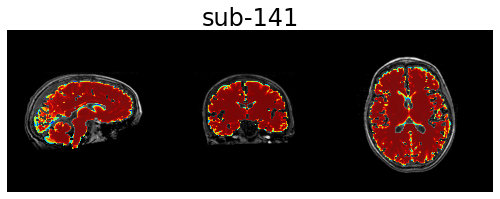

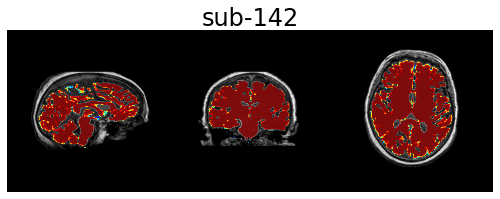

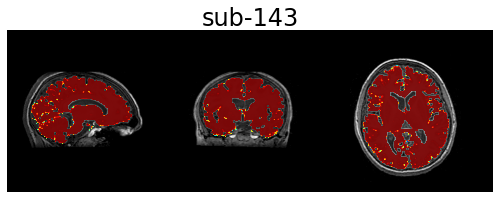

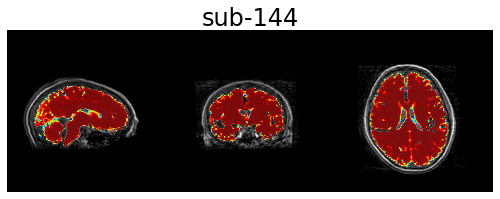

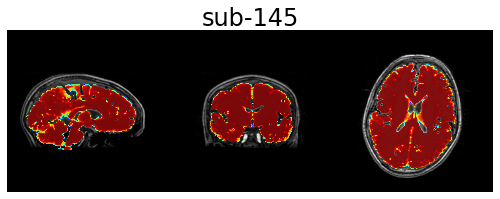

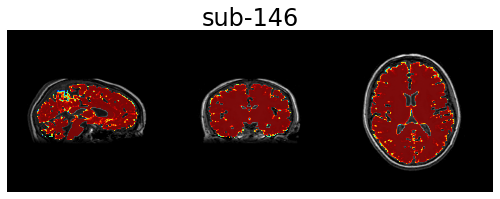

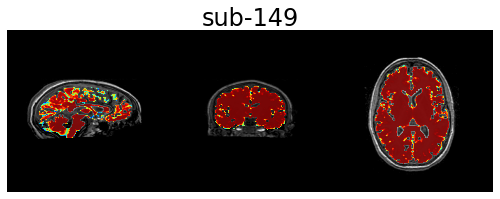

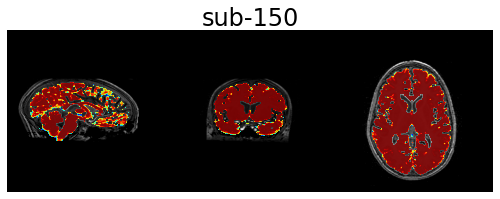

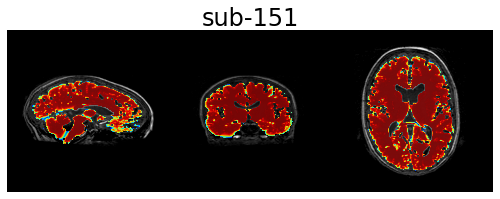

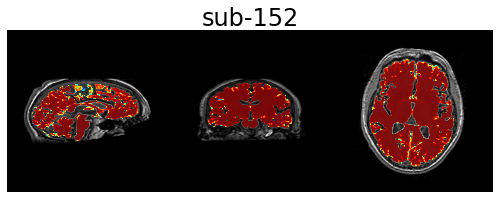

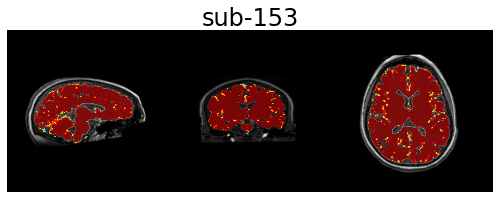

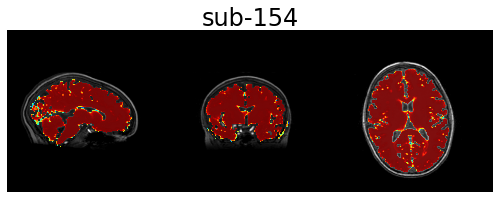

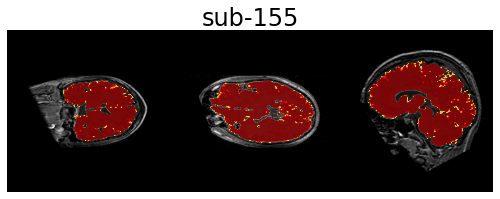

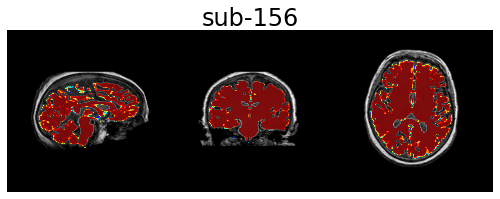

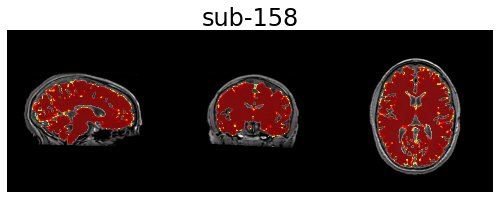

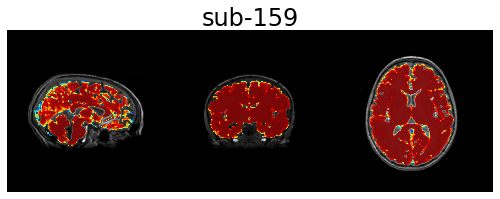

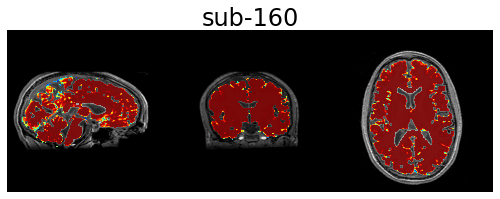

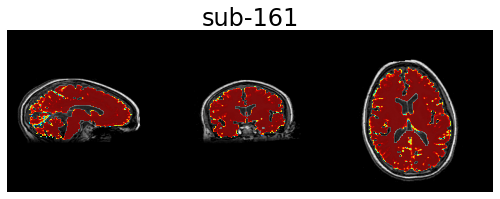

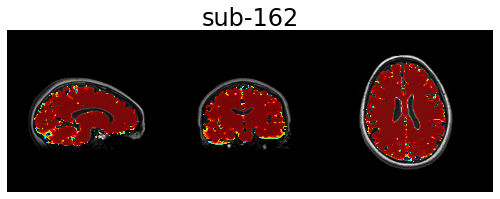

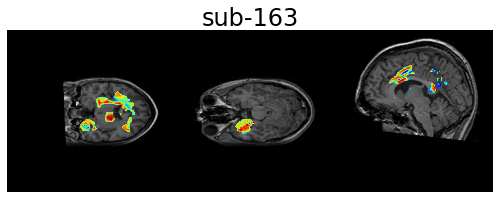

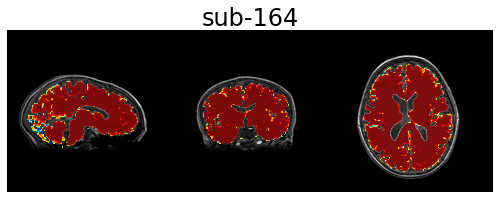

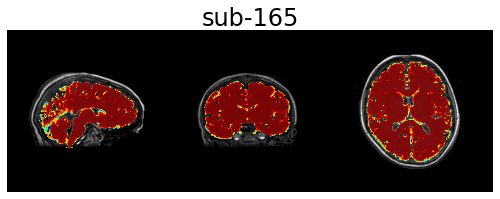

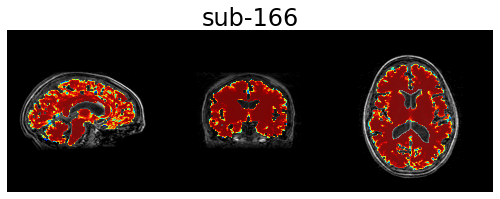

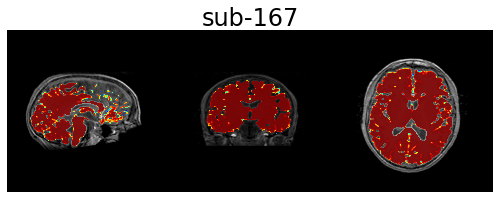

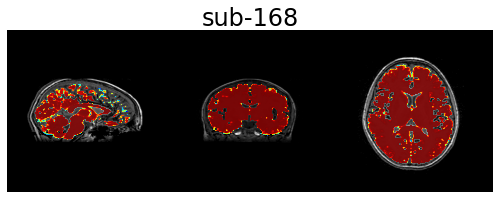

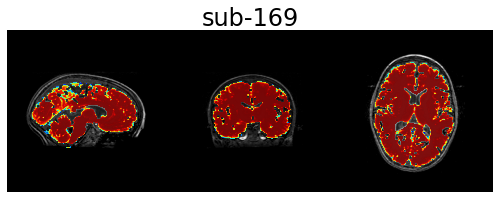

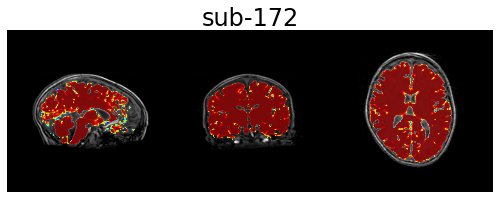

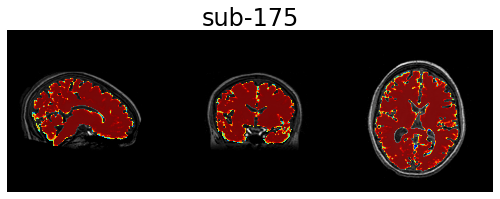

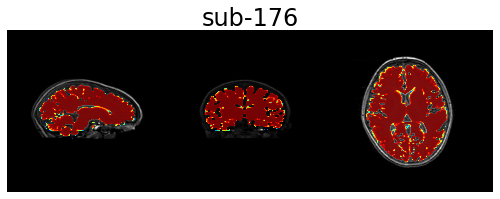

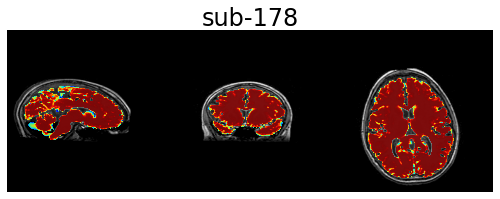

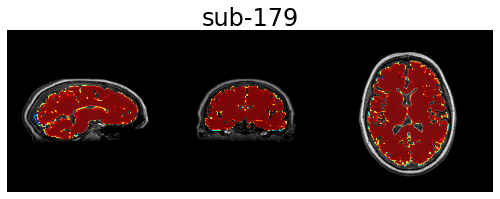

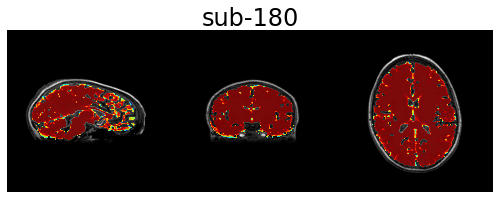

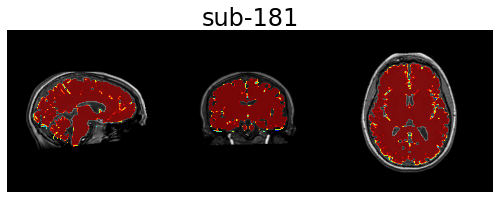

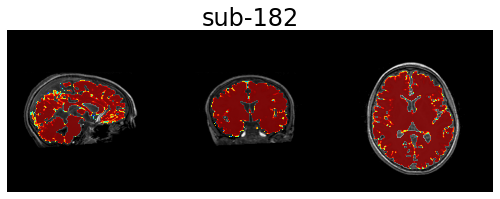

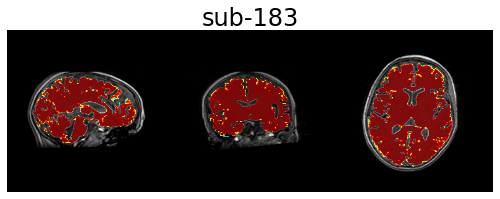

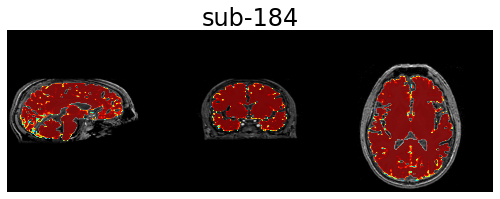

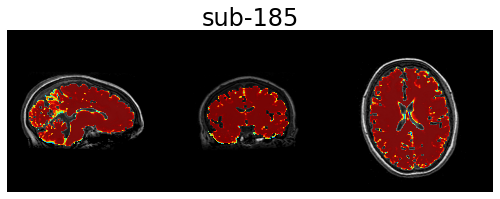

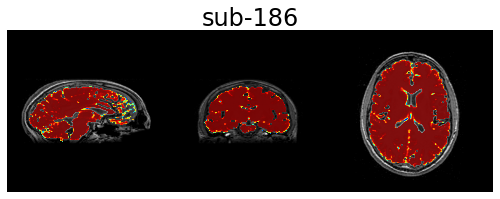

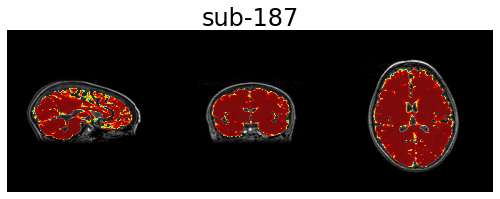

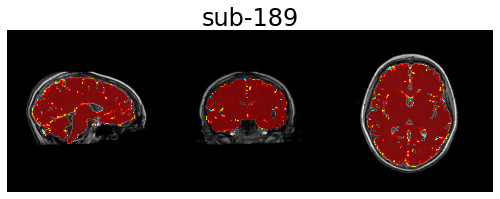

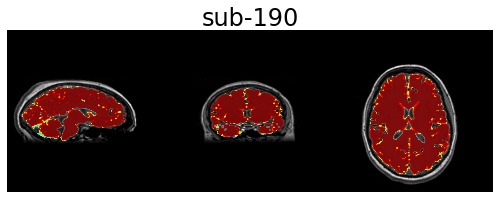

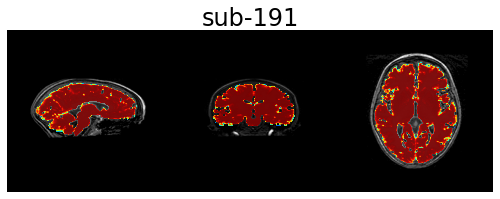

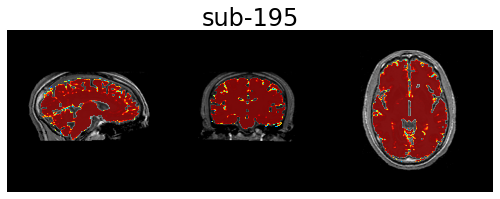

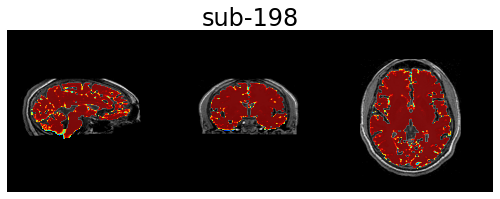

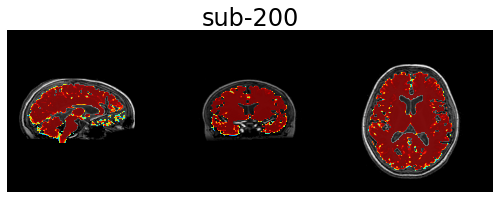

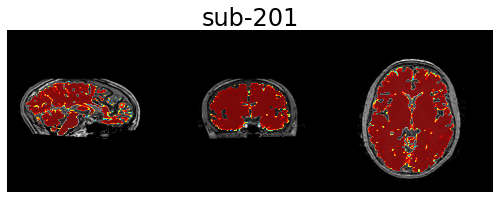

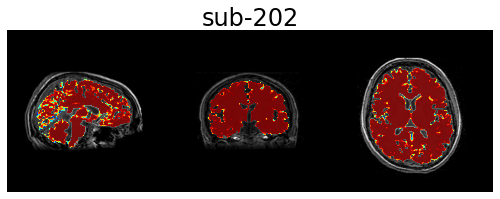

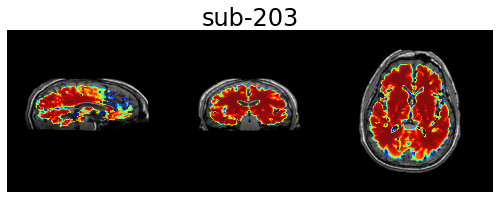

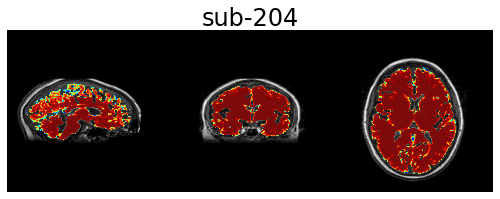

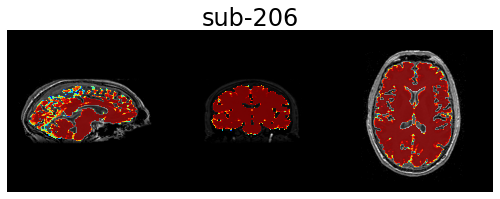

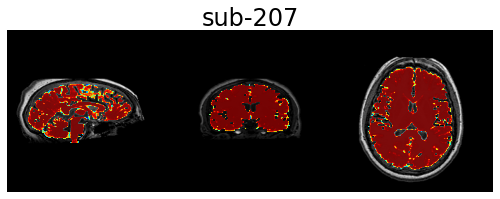

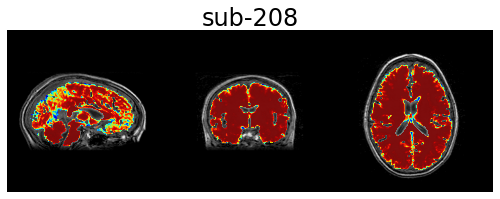

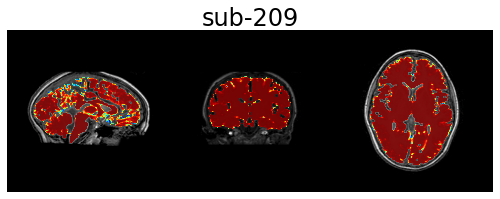

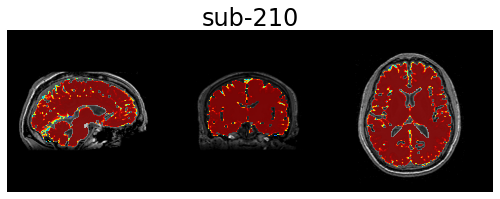

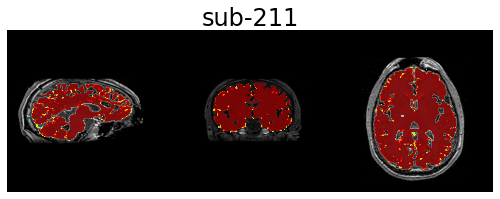

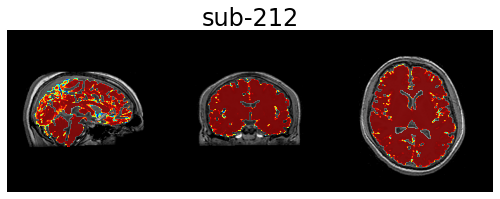

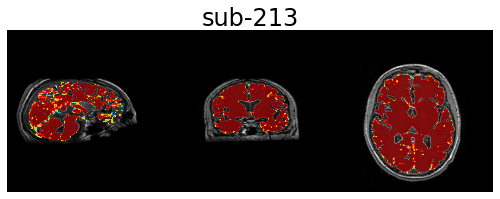

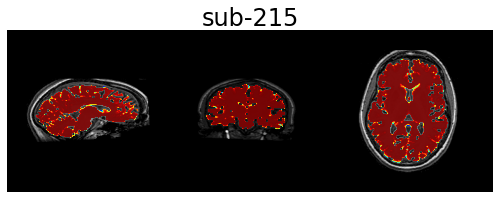

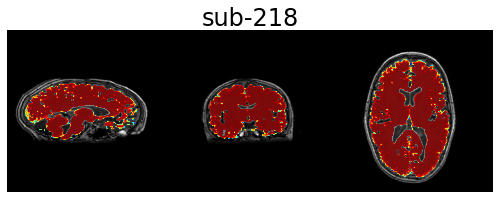

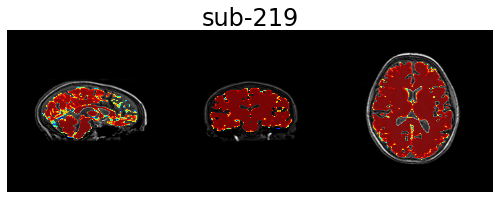

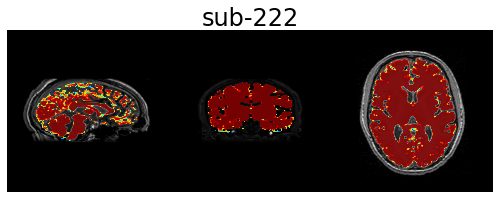

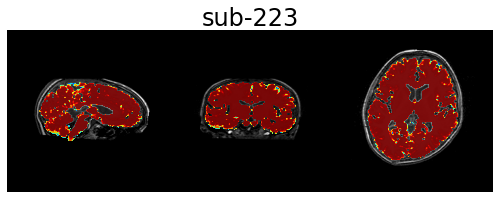

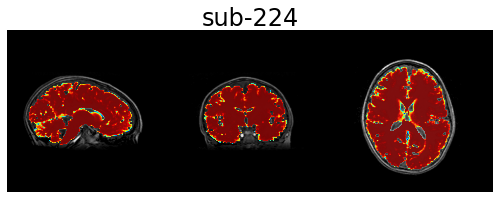

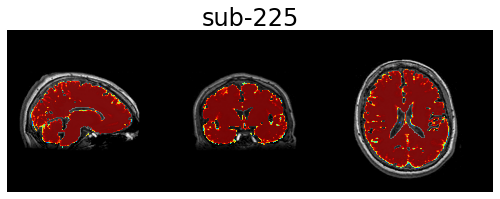

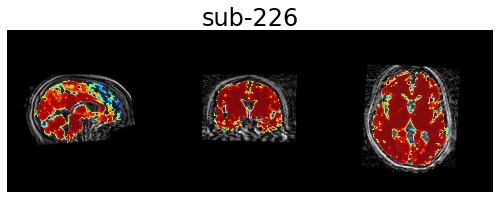

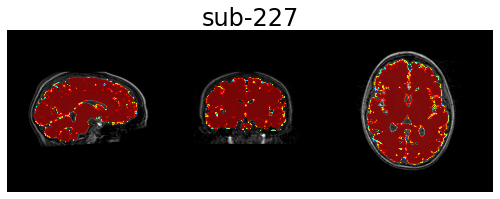

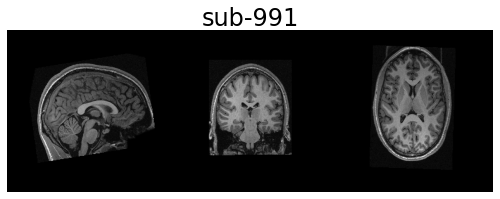

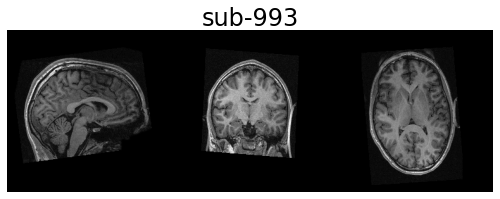

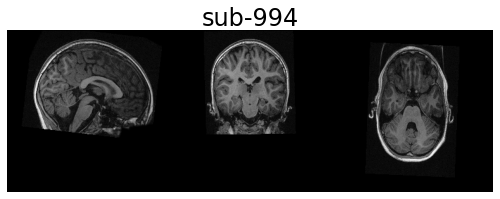

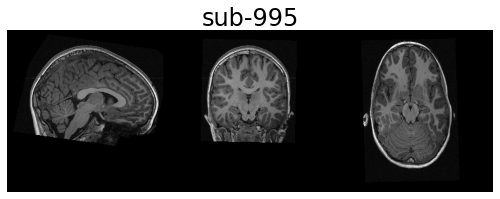

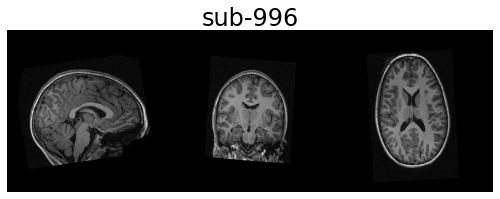

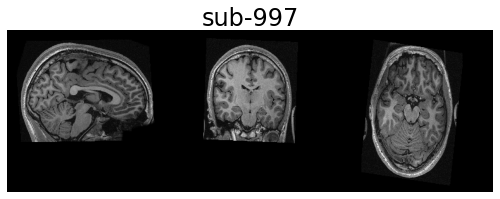

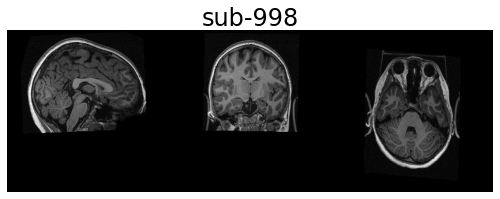

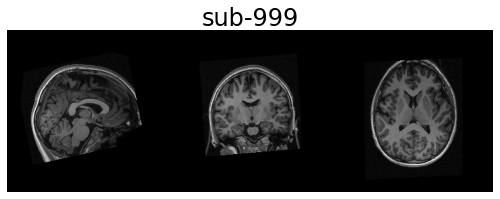

CPU times: user 1min 21s, sys: 23.2 s, total: 1min 44s
Wall time: 1min 42s


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [27]:
%%time
[plot_brain_overlay(sub) for sub in bad_subs];